# Notary Register for RealEstate Transactions

In [1]:
from IPython.display import Image

In [2]:
Image(url='http://www.casagrande-labrousse-notaires.com/wp-content/uploads/2016/11/notaire-paris-rue-lincoln-zoom.png')

In [40]:
import pandas as pd
import numpy as np
import json
from string import ascii_uppercase
import itertools
import requests as r
import matplotlib.pyplot as plt
import seaborn as sns

# Import from CSV file

In [4]:
df = pd.read_csv(r'C:\Users\Arthur\Notary Transactions\75109_000AA.csv', sep=';')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Arthur\\Notary Transactions\\75109_000AA.csv'

In [ ]:
df.dtypes

# Import JSON file from the API

In [5]:
# function to genere URL for all (fr AA to BF) for the commune 75109 - Paris 9e
lst=[]
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_uppercase, repeat=size):
            yield "".join(s)
for s in iter_all_strings():
    if len(s)<2:
        pass
    else:
        lst.append(s)
    if s == 'BF':
        break
print(lst)

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF']


In [8]:
# loop to import all section (fr AA to BF) from the commune 75109 - Paris 9e
lst_df=[]
for i in lst:
    data=r.get(f'https://app.dvf.etalab.gouv.fr/api/mutations3/75109/000{i}')
    data=data.json()
    df = pd.DataFrame(data['mutations'])
    lst_df.append(df) 
db=pd.concat(lst_df, axis=0, ignore_index=True)
db

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2019-1072649,2019-12-23,1,Vente,665000.0,47,None,RUE DE DOUAI,2909,75009,...,55.0,4.0,None,None,None,None,nan,2.330953,48.882913,000AA
1,2019-1072739,2019-12-19,1,Vente,18300000.0,106,None,RUE D AMSTERDAM,0300,75009,...,693.0,0.0,None,None,None,None,nan,2.327339,48.883026,000AA
2,2019-1072673,2019-12-16,1,Vente,71000.0,14,None,RUE BALLU,0646,75009,...,nan,0.0,None,None,None,None,nan,2.330517,48.882159,000AA
3,2019-1072512,2019-12-13,1,Vente,1520000.0,1,None,PL ADOLPHE MAX,0065,75009,...,123.0,5.0,None,None,None,None,nan,2.330485,48.883136,000AA
4,2019-1072512,2019-12-13,1,Vente,1520000.0,1,None,PL ADOLPHE MAX,0065,75009,...,6.0,1.0,None,None,None,None,nan,2.330485,48.883136,000AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13933,2014-1059819,2014-01-13,1,Vente,252000.0,10,None,RUE DE ROCHECHOUART,8289,75009,...,25.0,1,None,None,None,None,None,2.345008,48.877038,000BF
13934,2014-1059714,2014-01-10,1,Vente,540000.0,10,None,RUE MAYRAN,6223,75009,...,60.0,3,None,None,None,None,None,2.344981,48.877407,000BF
13935,2014-1059717,2014-01-10,1,Vente,102000.0,4,None,RUE ROCHAMBEAU,8283,75009,...,nan,0,None,None,None,None,None,2.34667,48.877538,000BF
13936,2014-1059717,2014-01-10,1,Vente,102000.0,4,None,RUE ROCHAMBEAU,8283,75009,...,nan,0,None,None,None,None,None,2.34667,48.877538,000BF


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13938 entries, 0 to 13937
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_mutation                   13938 non-null  object
 1   date_mutation                 13938 non-null  object
 2   numero_disposition            13938 non-null  object
 3   nature_mutation               13938 non-null  object
 4   valeur_fonciere               13938 non-null  object
 5   adresse_numero                13938 non-null  object
 6   adresse_suffixe               13938 non-null  object
 7   adresse_nom_voie              13938 non-null  object
 8   adresse_code_voie             13938 non-null  object
 9   code_postal                   13938 non-null  object
 10  code_commune                  13938 non-null  object
 11  nom_commune                   13938 non-null  object
 12  code_departement              13938 non-null  object
 13  ancien_code_comm

In [66]:
# to convert nan & None to 0
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('nan', 0)
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('None', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('nan', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('None', 0)

# to convert required columns to float64
db['lot1_surface_carrez'] = np.float64(db['lot1_surface_carrez'])
db['lot2_surface_carrez'] = np.float64(db['lot2_surface_carrez'])
db['lot3_surface_carrez'] = np.float64(db['lot3_surface_carrez'])
db['lot4_surface_carrez'] = np.float64(db['lot4_surface_carrez'])
db['lot5_surface_carrez'] = np.float64(db['lot5_surface_carrez'])
db['surface_reelle_bati'] = np.float64(db['surface_reelle_bati'])
db['valeur_fonciere'] = np.float64(db['valeur_fonciere'])

# adding new colum for the sum & compare to 'surface_reelle_bati'
db['surface_carrez_total']=db['lot1_surface_carrez']+db['lot2_surface_carrez']+db['lot3_surface_carrez']+db['lot4_surface_carrez']+db['lot5_surface_carrez']
db[['surface_reelle_bati','surface_carrez_total']].head(25)

,surface_reelle_bati,surface_carrez_total
0,55.0,57.40
1,693.0,0.00
2,0.0,0.00
3,123.0,125.75
4,6.0,5.57
5,0.0,6.68
6,0.0,4.07
7,54.0,52.60
8,0.0,7.00
9,0.0,3.65


In [20]:
db.groupby('section_prefixe')['valeur_fonciere'].agg('mean')

section_prefixe
000AA    2.139345e+06
000AB    4.550311e+06
000AC    1.295044e+06
000AD    8.158309e+05
000AE    1.049914e+06
000AF    7.842568e+05
000AG    6.171250e+05
000AH    4.316779e+07
000AI    2.806252e+07
000AJ    4.853789e+06
000AK    1.663914e+07
000AL    2.017480e+07
000AM    3.665038e+07
000AN    2.437019e+07
000AO    8.445859e+07
000AP    2.054423e+06
000AQ    1.302644e+07
000AR    9.548530e+06
000AS    3.642260e+07
000AT    1.895402e+08
000AU    3.896609e+06
000AV    9.828043e+06
000AW    1.037169e+06
000AX    1.295687e+06
000AY    2.170450e+06
000AZ    9.670375e+05
000BA    4.730558e+05
000BB    9.972754e+05
000BC    6.300545e+05
000BD    3.038018e+06
000BE    6.635689e+05
000BF    6.634310e+05
Name: valeur_fonciere, dtype: float64

In [39]:
df2=pd.DataFrame(db.groupby(['section_prefixe']).size())
df2

,0
section_prefixe,
000AA,624
000AB,655
000AC,648
000AD,488
000AE,246
000AF,519
000AG,345
000AH,655
000AI,343


<AxesSubplot:xlabel='section_prefixe'>

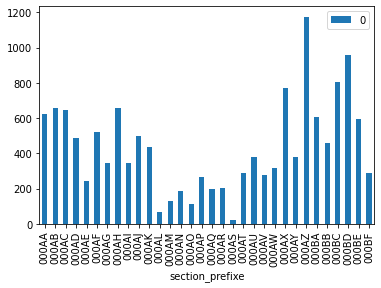

In [55]:
df2.plot(kind='bar')

In [58]:
df3=pd.DataFrame(db.groupby('section_prefixe')['valeur_fonciere'].agg('mean'))
df3

,valeur_fonciere
section_prefixe,
000AA,2.139345e+06
000AB,4.550311e+06
000AC,1.295044e+06
000AD,8.158309e+05
000AE,1.049914e+06
000AF,7.842568e+05
000AG,6.171250e+05
000AH,4.316779e+07
000AI,2.806252e+07


<AxesSubplot:xlabel='section_prefixe'>

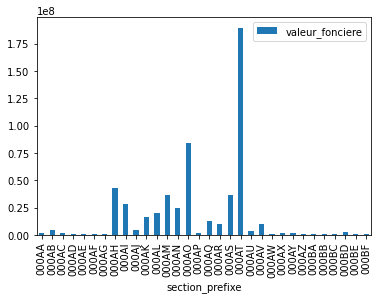

In [59]:
df3.plot(kind='bar')

In [75]:
db['valeur_fonciere']=db['valeur_fonciere'].replace('nan', 0)
db['valeur_fonciere']=db['valeur_fonciere'].replace('None', 0)
db['valeur_fonciere']=db['valeur_fonciere'].fillna(0)

db[['id_mutation','section_prefixe','valeur_fonciere']].sort_values(by='valeur_fonciere', ascending=False)

,id_mutation,section_prefixe,valeur_fonciere
5872,2018-1374958,000AO,421000000.0
5873,2018-1374958,000AO,421000000.0
5865,2018-1374958,000AO,421000000.0
5864,2018-1374958,000AO,421000000.0
5863,2018-1374958,000AO,421000000.0
...,...,...,...
9956,2015-1152755,000AZ,0.0
8627,2014-1061893,000AX,0.0
8626,2014-1061893,000AX,0.0
8625,2014-1061893,000AX,0.0


In [76]:
db[db['id_mutation']=='2018-1374958']

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,surface_carrez_total
5861,2018-1374958,2018-09-27,1,Vente,421000000.0,15.0,B,RUE LAFFITTE,5246,75009,...,0.0,S,sols,None,None,473.0,2.337376,48.872978,000AO,0.0
5862,2018-1374958,2018-09-27,1,Vente,421000000.0,15.0,B,RUE LAFFITTE,5246,75009,...,0.0,S,sols,None,None,749.0,2.33713,48.87285,000AO,0.0
5863,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5864,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5865,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5866,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5867,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5868,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5869,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0
5870,2018-1374958,2018-09-27,1,Vente,421000000.0,14.0,None,BD HAUSSMANN,4485,75009,...,0.0,S,sols,None,None,1141.0,2.337106,48.872719,000AO,0.0


In [68]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13938 entries, 0 to 13937
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   13938 non-null  object 
 1   date_mutation                 13938 non-null  object 
 2   numero_disposition            13938 non-null  object 
 3   nature_mutation               13938 non-null  object 
 4   valeur_fonciere               13916 non-null  float64
 5   adresse_numero                13938 non-null  object 
 6   adresse_suffixe               13938 non-null  object 
 7   adresse_nom_voie              13938 non-null  object 
 8   adresse_code_voie             13938 non-null  object 
 9   code_postal                   13938 non-null  object 
 10  code_commune                  13938 non-null  object 
 11  nom_commune                   13938 non-null  object 
 12  code_departement              13938 non-null  object 
 13  a

In [77]:
pip install table_of_content

ERROR: Could not find a version that satisfies the requirement table_of_content (from versions: none)
ERROR: No matching distribution found for table_of_content
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
